In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kshitij192/cars-image-dataset

 39% 14.0M/36.3M [00:00<00:00, 146MB/s]
100% 36.3M/36.3M [00:00<00:00, 208MB/s]


In [3]:
!unzip cars-image-dataset.zip -d dataset_directory

Archive:  cars-image-dataset.zip
  inflating: dataset_directory/Cars Dataset/test/Audi/1000.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1003.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1008.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1020.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1022.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1025.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1027.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1038.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/104.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1043.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1051.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1059.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1060.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1064.jpg  
  inflating: dataset_directory/Cars Dataset/test/Audi/1066

In [4]:
!unzip cars-image-dataset.zip -d cars_dataset

Archive:  cars-image-dataset.zip
  inflating: cars_dataset/Cars Dataset/test/Audi/1000.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1003.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1008.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1020.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1022.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1025.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1027.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1038.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/104.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1043.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1051.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1059.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1060.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1064.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1066.jpg  
  inflating: cars_dataset/Cars Dataset/test/Audi/1072.jpg  
  inflat

## **Import Library Yang Digunakan**
***

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

## **Mengatur Path Menjadi Train, Val, dan Test**
***

In [6]:
test_dir = '/content/cars_dataset/Cars Dataset/test'
val_dir = '/content/cars_dataset/Cars Dataset/train'
train_dir = '/content/cars_dataset/Cars Dataset/train'


In [7]:
import os

In [8]:
jns = os.listdir(test_dir)
jns

['Mahindra Scorpio',
 'Hyundai Creta',
 'Tata Safari',
 'Audi',
 'Rolls Royce',
 'Swift',
 'Toyota Innova']

## **Menggunakan ImageDataGenerator Untuk Memuat Serta Melakukan Augmentasi Pada Data**
***

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## **Split Dataset Menjadi Train, Val, dan Test**
***

**Data Train**

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 3352 images belonging to 7 classes.


**Data Val**

In [12]:
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 3352 images belonging to 7 classes.


**Data Set**

In [13]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 813 images belonging to 7 classes.


## Membuat Model Sequential**
***

In [14]:
model = Sequential()

## **Menggunakan Pre-trained Model VGG16**
***

In [15]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


## **Menggunakan Optimizer, Loss, dan Metrics**
***

In [16]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## **Callbacks**
***

In [17]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

## **Latih Model**
***

In [18]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
105/105 [==============================] - 47s 332ms/step - loss: -2736.4961 - accuracy: 0.0814 - val_loss: -7845.9517 - val_accuracy: 0.0808 - lr: 0.0010
Epoch 2/10
105/105 [==============================] - 30s 283ms/step - loss: -18566.7656 - accuracy: 0.0808 - val_loss: -32005.6426 - val_accuracy: 0.0808 - lr: 0.0010
Epoch 3/10
105/105 [==============================] - 30s 286ms/step - loss: -52690.4453 - accuracy: 0.0808 - val_loss: -74701.8984 - val_accuracy: 0.0808 - lr: 0.0010
Epoch 4/10
105/105 [==============================] - 30s 280ms/step - loss: -105057.6875 - accuracy: 0.0808 - val_loss: -135352.5625 - val_accuracy: 0.0808 - lr: 0.0010
Epoch 5/10
105/105 [==============================] - 30s 290ms/step - loss: -175769.1094 - accuracy: 0.0808 - val_loss: -213209.3594 - val_accuracy: 0.0808 - lr: 0.0010
Epoch 6/10
105/105 [==============================] - 31s 295ms/step - loss: -263542.7500 - accuracy: 0.0808 - val_loss: -308042.4375 - val_accuracy: 0.0808 -

## **Evaluasi Model**
***

In [19]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

26/26 [==============================] - 3s 122ms/step - loss: -835442.3125 - accuracy: 0.0824
Akurasi pada data test: 0.08


## **Membuat Grafik Pergerakan Metrik Accuracy dan Loss Terhadap Epoch Training dan Validation**
***

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

## **Grafik Accuracy**
***

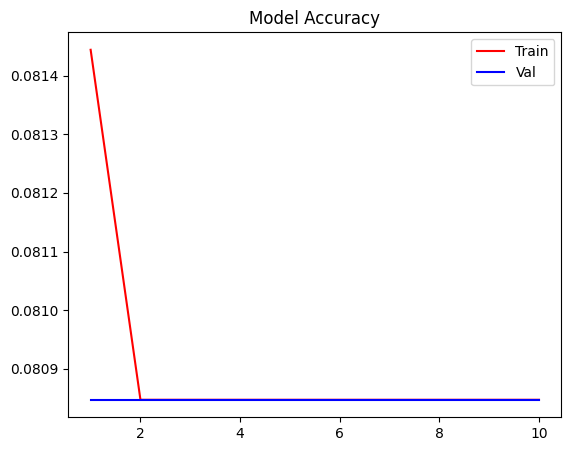

In [21]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

## **Grafik Loss**
***

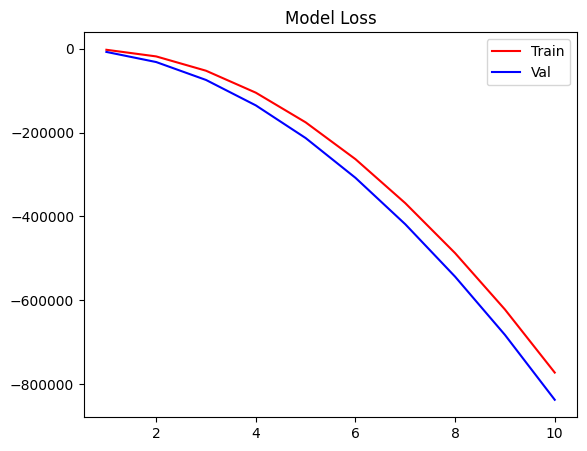

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

## **Menampilkan Gambar**
***

In [25]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [26]:
path_gambar = '/content/cars_dataset/Cars Dataset/test/Audi/1000.jpg'

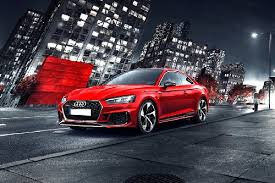

In [31]:
gambar = load_img(path_gambar)
gambar

In [34]:
brigth = random_brightness(gambar, max_delta=5)

Text(0.5, 1.0, 'Gambar Sebelum Argumentasi')

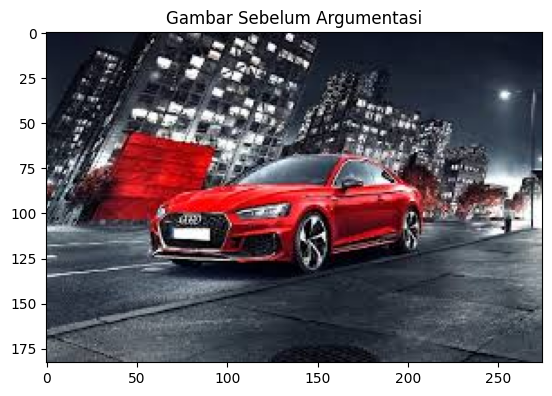

In [35]:
plt.imshow(gambar)
plt.title('Gambar Sebelum Argumentasi')